In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Salary data.csv')

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.shape

(420, 6)

In [5]:
df.dropna(how="all",axis=0,inplace=True)

In [6]:
df.shape

(418, 6)

In [7]:
print(df['Education Level'].unique())

["Bachelor's" "Master's" 'PhD' nan]


### Checking For Age

In [8]:
# Perform Feature Engineering
df.isnull().sum()

Age                    2
Gender                 1
Education Level        2
Job Title              2
Years of Experience    0
Salary                 4
dtype: int64

In [9]:
df[df['Age'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
375,NaN,Male,Bachelor's,NaN,9.0,NaN
397,NaN,Male,Master's,Director of Engineering,19.0,NaN


In [10]:
bachelor_ages = df.loc[df['Education Level'] == "Bachelor's", ['Age', 'Years of Experience']]
master_ages = df.loc[df['Job Title'] == "Director of Engineering", ['Age', 'Education Level']]

In [11]:
bachelor_ages

,Age,Years of Experience
0,32.0,5.0
3,36.0,7.0
5,29.0,2.0
7,31.0,4.0
8,26.0,1.0
...,...,...
410,29.0,2.0
411,34.0,7.0
414,35.0,8.0
416,43.0,3.0


In [12]:
# Further filter rows where 'Years of Experience' is greater than or equal to 19
filtered_bachelor_ages = bachelor_ages[bachelor_ages['Years of Experience'] == 9]

In [13]:
filtered_bachelor_ages

,Age,Years of Experience
23,36.0,9.0
55,36.0,9.0
111,37.0,9.0
187,34.0,9.0
216,35.0,9.0
236,37.0,9.0
257,35.0,9.0
269,39.0,9.0
275,38.0,9.0
284,35.0,9.0


In [14]:
age1 = float(round(filtered_bachelor_ages['Age'].mean()))
age1

36.0

In [15]:
master_ages

,Age,Education Level
323,47.0,PhD
347,45.0,Master's
397,NaN,Master's


In [16]:
age2 = master_ages['Age'].mean()
age2

46.0

In [17]:
# Specify the index and the new value for the 'Age' column
# For example, update the 'Age' value at index 1 to 30
# This is not good practice for large missing values
df.loc[375, 'Age'] = age1
df.loc[397, 'Age'] = age2

In [18]:
df.isnull().sum()

Age                    0
Gender                 1
Education Level        2
Job Title              2
Years of Experience    0
Salary                 4
dtype: int64

In [19]:
df.loc[375, 'Age']

36.0

In [20]:
df.loc[397, 'Age']

46.0

### Checking for Education  Level

In [21]:
df[df['Education Level'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
413,33.0,Male,NaN,Junior Marketing Specialist,5.0,70000.0
419,43.0,Male,NaN,Junior Business Analyst,4.0,60000.0


In [22]:
edu_level = df.loc[df['Job Title'] == "Junior Marketing Specialist", ['Education Level', 'Years of Experience']]
edu_level

,Education Level,Years of Experience
144,Master's,1.5
230,Bachelor's,3.0
292,Bachelor's,2.0
339,Bachelor's,5.0
363,Bachelor's,5.0
389,Bachelor's,5.0
413,NaN,5.0


In [23]:
edu_level2 = df.loc[df['Job Title'] == "Junior Business Analyst", ['Education Level', 'Years of Experience']]
edu_level2

,Education Level,Years of Experience
140,Bachelor's,2.0
195,Bachelor's,2.0
241,Bachelor's,1.5
274,Bachelor's,2.0
286,Bachelor's,4.0
313,Bachelor's,4.0
345,Bachelor's,4.0
369,Bachelor's,4.0
395,Bachelor's,4.0
419,NaN,4.0


We understand most of them are bachelor's by our observation

In [24]:
df['Education Level'].fillna("Bachelor's",axis=0,inplace=True)

### Checking for Gender

In [25]:
# Fill Gender as randomly
df['Gender'].fillna("Male",axis=0,inplace=True)

In [26]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              2
Years of Experience    0
Salary                 4
dtype: int64

### Checking for Job title

In [27]:
df[df['Job Title'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
375,36.0,Male,Bachelor's,NaN,9.0,NaN
416,43.0,Female,Bachelor's,NaN,3.0,50000.0


In [28]:
job1 = df.loc[df['Years of Experience'] == 9, ['Job Title', 'Years of Experience']]
job1

,Job Title,Years of Experience
23,Recruiter,9.0
55,Sales Manager,9.0
111,Software Project Manager,9.0
126,Senior HR Generalist,9.0
154,Senior Marketing Analyst,9.0
169,Senior Software Engineer,9.0
181,Senior Business Analyst,9.0
187,Senior Quality Assurance Analyst,9.0
199,Senior Software Developer,9.0
210,Senior IT Consultant,9.0


In [29]:
job1.dropna(inplace=True) # Avoiding to take nan sample

In [30]:
# Select a random job title
random_job_title = job1['Job Title'].sample(n=1).values[0]
random_job_title

'Senior Operations Manager'

In [31]:
job2 = df.loc[(df['Years of Experience'] == 3) & (df['Salary'] == 50000), ['Job Title', 'Years of Experience','Salary']]
job2

,Job Title,Years of Experience,Salary
54,Graphic Designer,3.0,50000.0
61,Marketing Analyst,3.0,50000.0
106,Digital Content Producer,3.0,50000.0
247,Junior Financial Analyst,3.0,50000.0
263,Junior Marketing Coordinator,3.0,50000.0
280,Junior Operations Analyst,3.0,50000.0
307,Junior Operations Analyst,3.0,50000.0
330,Junior Business Development Associate,3.0,50000.0
342,Junior Financial Analyst,3.0,50000.0
354,Junior Business Development Associate,3.0,50000.0


In [32]:
job2.dropna(inplace=True) # Avoiding to take nan sample

In [33]:
# Select a random job title
random_job_title2 = job2['Job Title'].sample(n=1).values[0]
random_job_title2

'Junior Financial Analyst'

In [34]:
df.loc[375, 'Job Title'] = random_job_title
df.loc[416, 'Job Title'] = random_job_title2

In [35]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 4
dtype: int64

In [36]:
df['Salary'].median()

95000.0

In [37]:
df['Salary'].fillna(df['Salary'].median(),inplace=True)

In [38]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [39]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [40]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [41]:
# I want to add some columns for model performance
# Experience Level
def categorize_experience(years):
    if years < 5:
        return 'Junior'
    elif years < 10:
        return 'Mid'
    else:
        return 'Senior'

df['Experience Level'] = df['Years of Experience'].apply(categorize_experience)

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Experience Level
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Mid
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Junior
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Senior
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Mid
4,52.0,Male,Master's,Director,20.0,200000.0,Senior
...,...,...,...,...,...,...,...
415,43.0,Male,Master's,Director of Marketing,18.0,170000.0,Senior
416,43.0,Female,Bachelor's,Junior Financial Analyst,3.0,50000.0,Junior
417,43.0,Male,Bachelor's,Senior Product Manager,14.0,150000.0,Senior
418,43.0,Female,PhD,Senior Data Engineer,16.0,160000.0,Senior


In [42]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Experience Level       0
dtype: int64

In [43]:
df.describe()

,Age,Years of Experience,Salary
count,418.000000,418.000000,418.000000
mean,37.526316,10.032297,101232.894737
std,6.954841,6.504345,48091.134263
min,23.000000,0.000000,350.000000
25%,32.000000,4.000000,56250.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


### Applyin Encoding

In [44]:
encoded_all = pd.get_dummies(df.drop(columns=['Job Title']),drop_first=True)

In [45]:
encoded_all

,Age,Years of Experience,Salary,Gender_Male,Education Level_Master's,Education Level_PhD,Experience Level_Mid,Experience Level_Senior
0,32.0,5.0,90000.0,True,False,False,True,False
1,28.0,3.0,65000.0,False,True,False,False,False
2,45.0,15.0,150000.0,True,False,True,False,True
3,36.0,7.0,60000.0,False,False,False,True,False
4,52.0,20.0,200000.0,True,True,False,False,True
...,...,...,...,...,...,...,...,...
415,43.0,18.0,170000.0,True,True,False,False,True
416,43.0,3.0,50000.0,False,False,False,False,False
417,43.0,14.0,150000.0,True,False,False,False,True
418,43.0,16.0,160000.0,False,False,True,False,True


In [46]:
df['Job Title'].value_counts()

Job Title
Director of Marketing              16
Senior Business Analyst            14
Director of Operations             13
Senior Marketing Manager           11
Junior Business Analyst            10
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64

In [47]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Job Title' column
encoded_job_title = label_encoder.fit_transform(df['Job Title'])

# Display the DataFrame with encoded labels
encoded_job_title

array([159,  17, 130, 101,  22,  81,  93, 104,  82, 150, 158,  40,  36,
        96,  13,  89,  83, 116,  18, 102,   3, 172,  44,  98,  37, 157,
       160,  57, 112,  92,   6,   1,  19,  84, 130, 167,  39,  95,  16,
       103, 169,  88,  85,   2, 162,  10,   0,  29, 150,  41,  12,   5,
        34, 171,  38, 104, 170, 116, 156,  93,  30,  81,  40, 115,  47,
        21,  43,  14,   4, 118, 173,  98,  99, 166,  11,  96,  89, 153,
        42,   9, 165,  17, 106,   8,  56,  35,  46,  39, 144,  82,  91,
       101, 164, 134,   3, 168, 100,  76,  97,  87,  34,  94, 122,  80,
       143,   7,  20,  45, 131,  15, 120, 161, 163, 110,  62, 118,  86,
        90,  61, 141, 104,  29,  66,  12, 150,  47, 121, 105,  82, 152,
        30,  79, 154, 146,  73,   2, 144,  64,  54, 142,  49, 134,  76,
       148,  65, 110, 115,  70, 109,  32,  71, 111, 139,  53, 131, 129,
        59, 138,  28,  77, 149,  31,  52, 132, 125,  50, 108, 147,  60,
       153,  25,  63, 144,  55, 136, 134,  47, 124,  30,  73, 11

In [48]:
encoded_all.isnull().sum()

Age                         0
Years of Experience         0
Salary                      0
Gender_Male                 0
Education Level_Master's    0
Education Level_PhD         0
Experience Level_Mid        0
Experience Level_Senior     0
dtype: int64

In [49]:
encoded_all.shape

(418, 8)

In [50]:
pd.Series(encoded_job_title).isnull().sum()

0

In [51]:
encoded_job_title.shape

(418,)

In [52]:
df1 = encoded_all.astype(int) # Covert true false to 0 and 1
df2 = pd.DataFrame(encoded_job_title,columns=['Job Title'])

In [53]:
df1_reset = df1.reset_index(drop=True)
df2_reset = df2.reset_index(drop=True)
final_df = pd.concat([df1_reset, df2_reset], axis=1)

In [54]:
final_df

,Age,Years of Experience,Salary,Gender_Male,Education Level_Master's,Education Level_PhD,Experience Level_Mid,Experience Level_Senior,Job Title
0,32,5,90000,1,0,0,1,0,159
1,28,3,65000,0,1,0,0,0,17
2,45,15,150000,1,0,1,0,1,130
3,36,7,60000,0,0,0,1,0,101
4,52,20,200000,1,1,0,0,1,22
...,...,...,...,...,...,...,...,...,...
413,43,18,170000,1,1,0,0,1,29
414,43,3,50000,0,0,0,0,0,59
415,43,14,150000,1,0,0,0,1,141
416,43,16,160000,0,0,1,0,1,114


In [55]:
final_df.shape

(418, 9)

In [56]:
final_df.corr()

,Age,Years of Experience,Salary,Gender_Male,Education Level_Master's,Education Level_PhD,Experience Level_Mid,Experience Level_Senior,Job Title
Age,1.000000,0.972058,0.916819,-0.007727,0.299160,0.414399,-0.237640,0.846676,0.106426
Years of Experience,0.972058,1.000000,0.932336,0.017166,0.333657,0.423809,-0.245230,0.861833,0.094272
Salary,0.916819,0.932336,1.000000,0.075044,0.370418,0.475958,-0.180234,0.789789,0.138060
Gender_Male,-0.007727,0.017166,0.075044,1.000000,0.005415,-0.077414,0.071656,-0.083968,-0.019775
Education Level_Master's,0.299160,0.333657,0.370418,0.005415,1.000000,-0.234802,-0.017496,0.251642,-0.126626
Education Level_PhD,0.414399,0.423809,0.475958,-0.077414,-0.234802,1.000000,-0.234802,0.431447,0.182423
Experience Level_Mid,-0.237640,-0.245230,-0.180234,0.071656,-0.017496,-0.234802,1.000000,-0.544219,0.224666
Experience Level_Senior,0.846676,0.861833,0.789789,-0.083968,0.251642,0.431447,-0.544219,1.000000,0.126298
Job Title,0.106426,0.094272,0.138060,-0.019775,-0.126626,0.182423,0.224666,0.126298,1.000000


C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


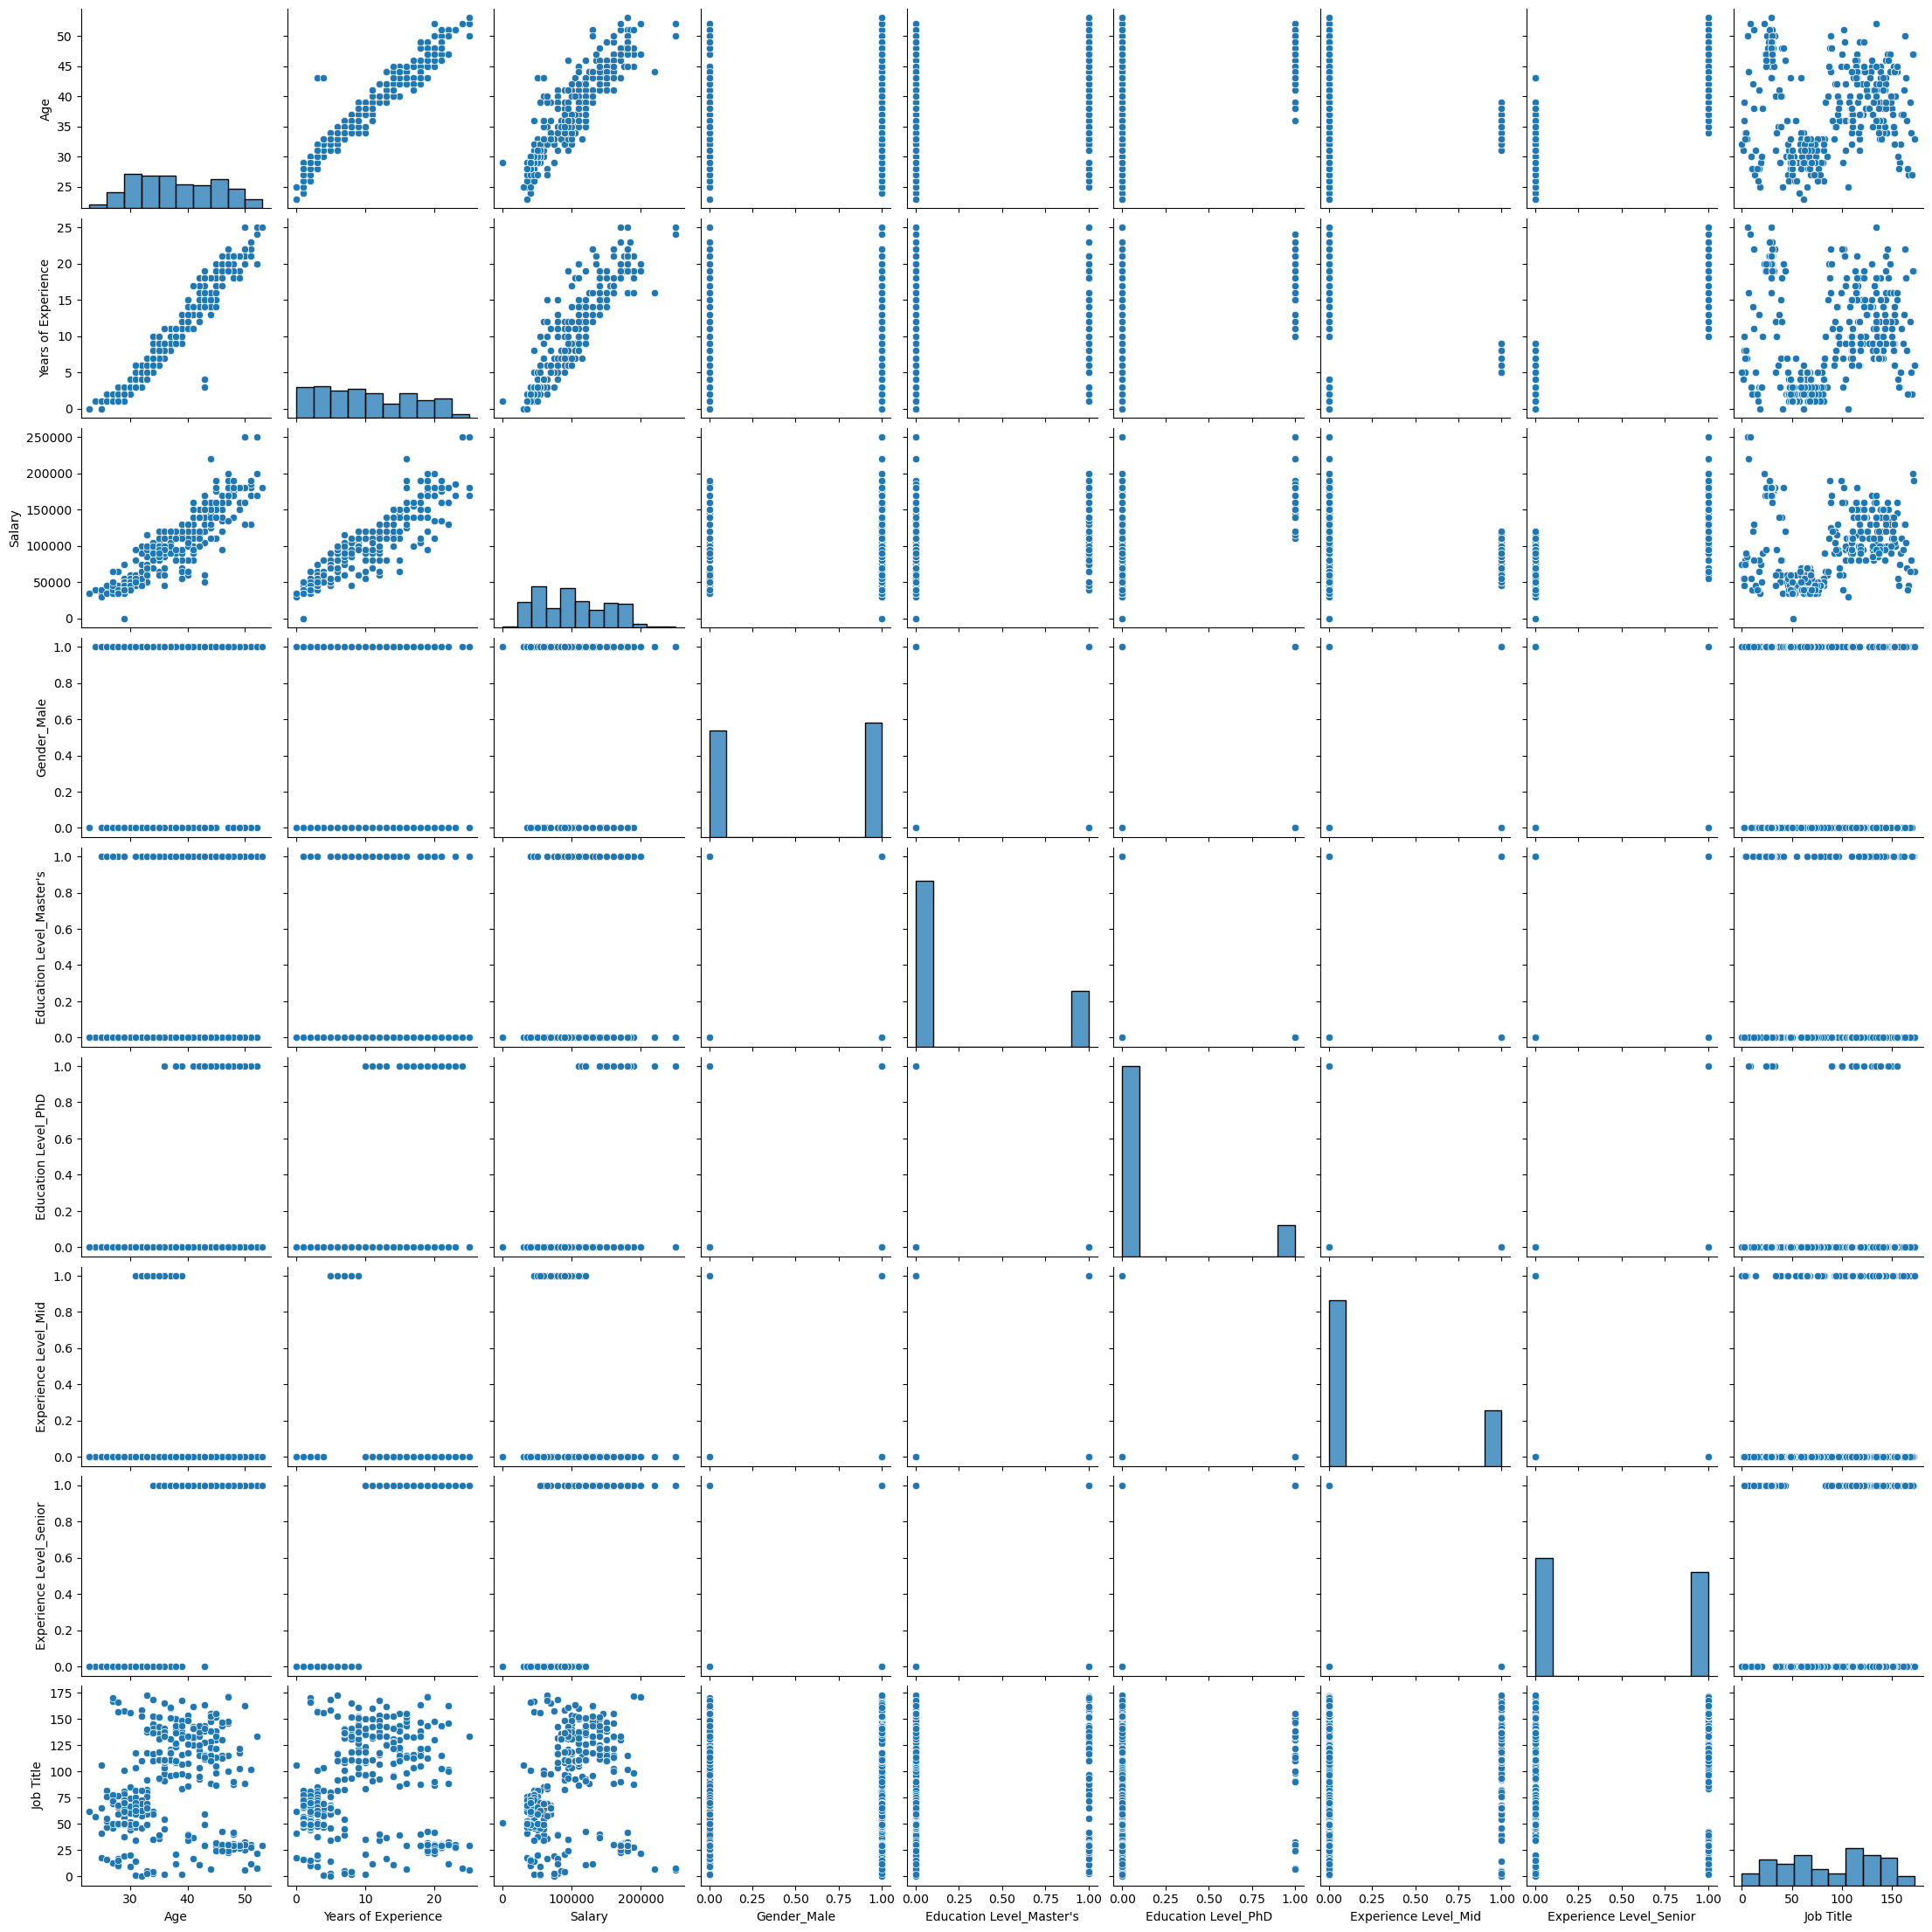

In [57]:
import seaborn as sns
sns.pairplot(final_df)

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
corr_map = final_df.corr()
corr_map.index

Index(['Age', 'Years of Experience', 'Salary', 'Gender_Male',
       'Education Level_Master's', 'Education Level_PhD',
       'Experience Level_Mid', 'Experience Level_Senior', 'Job Title'],
      dtype='object')

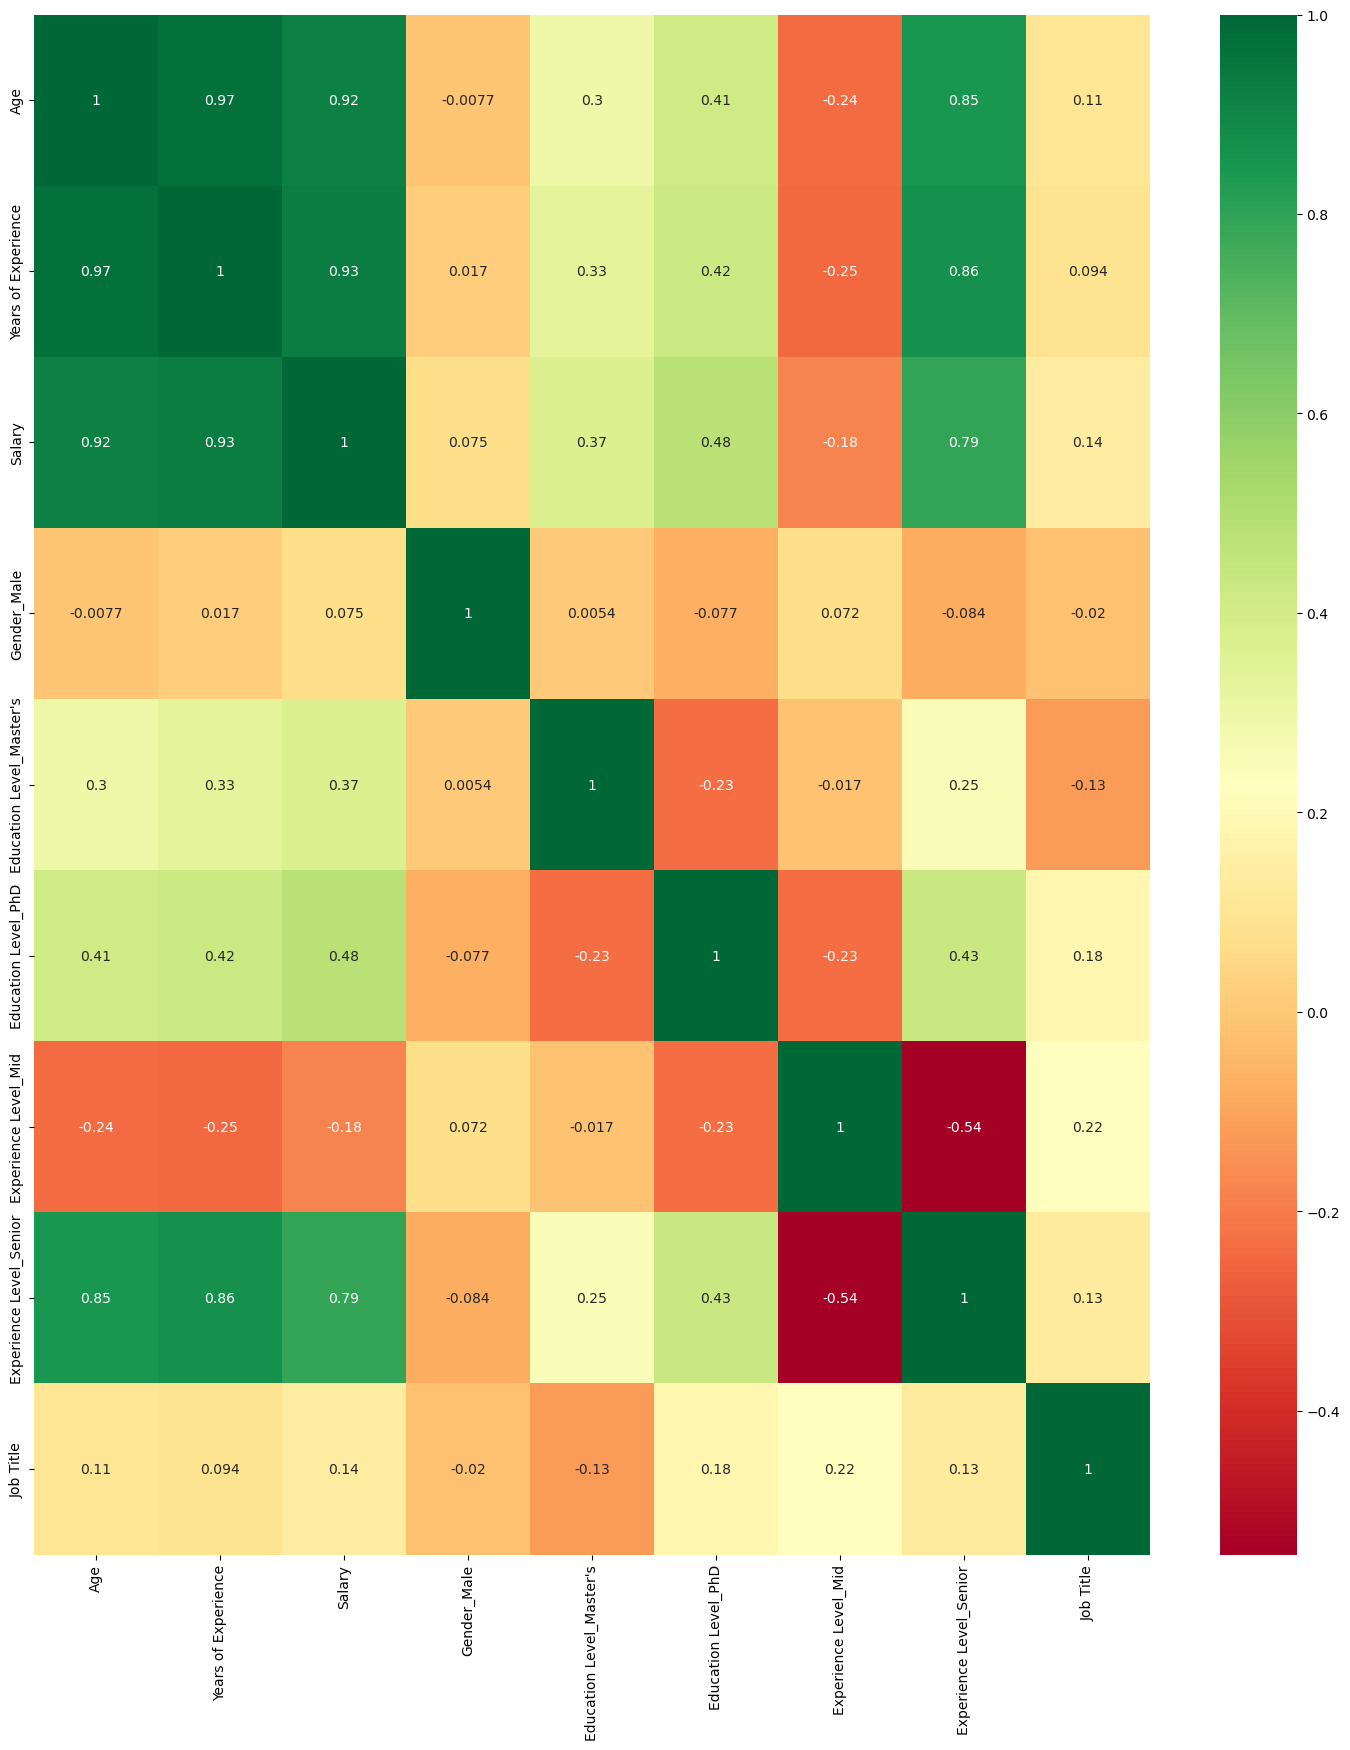

In [60]:
top_corr_features = corr_map.index
plt.figure(figsize=(18,20))

# Heat Map
g = sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We are dont apply standardization because i will plan to train model in tree based algorithm

In [61]:
final_df.to_csv('salary_preprocessed.csv', index=False)

In [62]:
import joblib
# Save the encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']